# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).






In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.cluster as cluster
import kneed as kn
import sklearn.metrics as metrics
import sklearn.preprocessing as pp

In [3]:
# Lectura de archivo

irisData = pd.read_csv("iris.csv")

In [4]:
# Head

irisData.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Correlación
irisData.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [6]:
# Describir dataset
irisData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


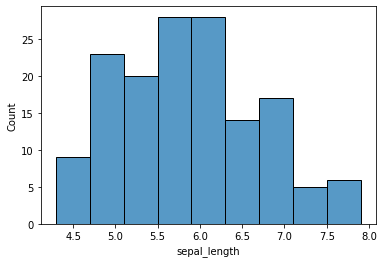

In [7]:
# EDA:

# Histograma de la longitud del sépalo:
sns.histplot(data=irisData, x="sepal_length", multiple="stack")

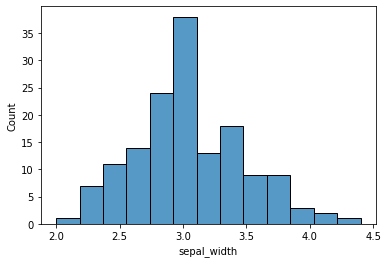

In [8]:
# Histograma del ancho del sépalo:
sns.histplot(data=irisData, x="sepal_width", multiple="stack")

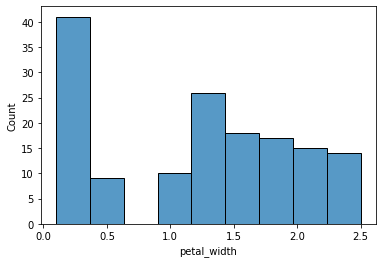

In [9]:
# Histograma de la longitud del pétalo:
sns.histplot(data=irisData, x="petal_width", multiple="stack")

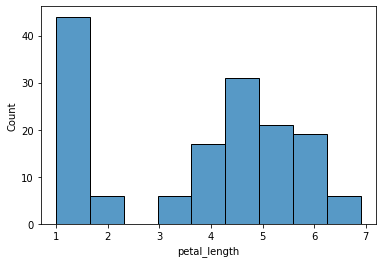

In [10]:
# Histograma del ancho del pétalo:
sns.histplot(data=irisData, x="petal_length", multiple="stack")

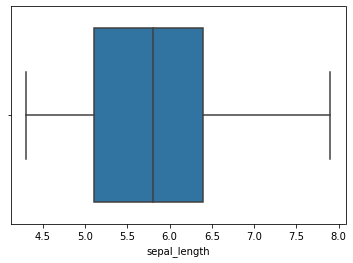

In [11]:
# Boxplot de la longitud del sépalo:
sns.boxplot(data=irisData, x="sepal_length")

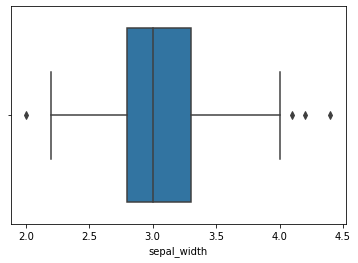

In [12]:
# Boxplot del ancho del sépalo:
sns.boxplot(data=irisData, x="sepal_width")

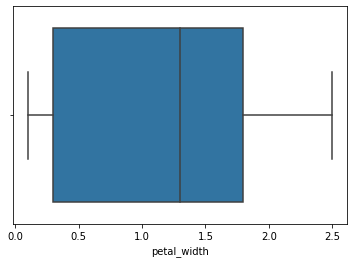

In [13]:
# Boxplot de la longitud del pétalo:
sns.boxplot(data=irisData, x="petal_width")

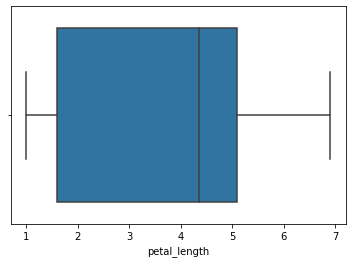

In [14]:
# Boxplot del ancho del pétalo:
sns.boxplot(data=irisData, x="petal_length")

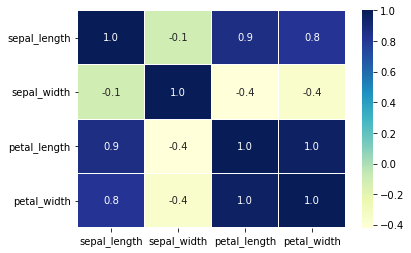

In [15]:
# Heatmap correlación de variables:

sns.heatmap(irisData.corr(), annot=True, cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt=".1f")

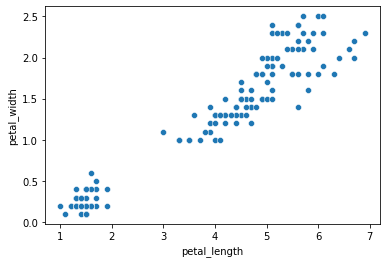

In [16]:
# Scatterplot de la longitud del pétalo vs el ancho del pétalo:

sns.scatterplot(data=irisData, x="petal_length", y="petal_width")

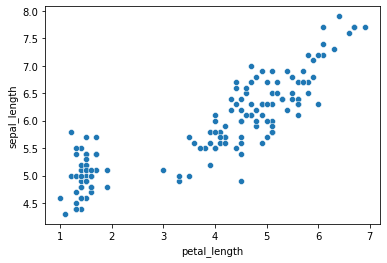

In [17]:
# Scatterplot de la longitud del petalo vs longitud del sépalo:
sns.scatterplot(data=irisData, x="petal_length", y="sepal_length")

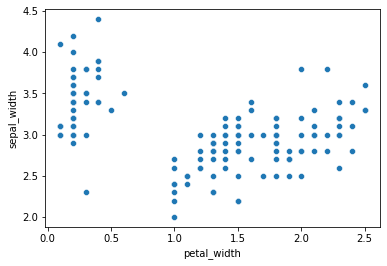

In [18]:
# Scatterplot de la ancho del petalo vs ancho del sepalo:
sns.scatterplot(data=irisData, x="petal_width", y="sepal_width")

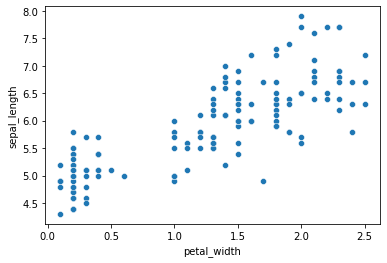

In [19]:
# Scatterplot de la ancho del petalo vs longitud del sepalo:
sns.scatterplot(data=irisData, x="petal_width", y="sepal_length")

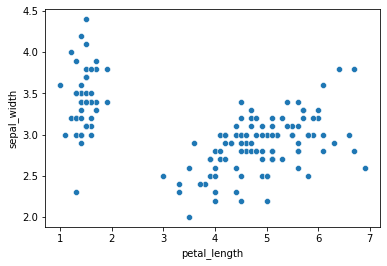

In [20]:
# Scatterplot de la largo del petalo vs ancho del sepalo:
sns.scatterplot(data=irisData, x="petal_length", y="sepal_width")

In [21]:
# Limpieza de datos nulos
if irisData.isnull().sum().sum() == 0:
    print("No hay valores nulos")
else:
    print("Hay valores nulos")
    irisData = irisData.dropna()

No hay valores nulos


In [22]:
# Limpieza de datos duplicados

if irisData.duplicated().sum() == 0:
    print("No hay valores duplicados")
else:
    print("Hay valores duplicados")
    irisData = irisData.drop_duplicates()

Hay valores duplicados


In [23]:
# 1.1 y 2.1
X = irisData[["sepal_length", "sepal_width"]].values
print(X.shape)

(147, 2)


**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

#### 1.1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

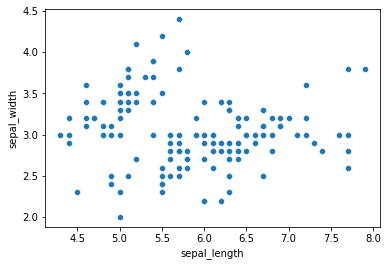

In [24]:
# Scatterplot de la longitud del sépalo vs el ancho del sépalo:

sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width")

In [25]:
# Se eligen las variables con mayor correlación (sépalo)

correlacion = irisData['sepal_length'].corr(irisData['sepal_width'])
X = irisData[["sepal_length", "sepal_width"]].values

#### 1.2.Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [26]:
K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


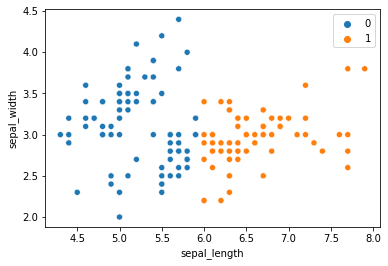

In [27]:
sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width", hue=Labels)

#### 3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

In [28]:
Escalador = pp.StandardScaler()
X = Escalador.fit_transform(X)

K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


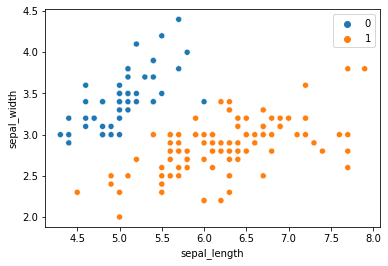

In [29]:
sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width", hue=Labels)

#### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

In [30]:
distancia = [cluster.KMeans(n_clusters=i).fit(X).inertia_ for i in range(1, 11)]
K = np.arange(1, 11)

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

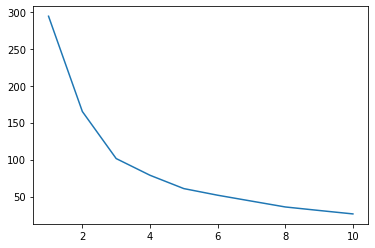

In [31]:
sns.lineplot(x=K, y=distancia)

#### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

In [42]:
cluster_two = cluster.KMeans(n_clusters=2)
cluster_two.fit(X)
cluster_two_prediction = cluster_two.predict(X)
cluster_two_prediction

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
cluster_two_data = irisData.copy()
cluster_two_data['Cluster'] = cluster_two_prediction
cluster_two_data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [45]:
cluster_three = cluster.KMeans(n_clusters=3)
cluster_three.fit(X)
cluster_three_prediction = cluster_three.predict(X)
cluster_three_prediction

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
cluster_three_data = irisData.copy()
cluster_three_data['Cluster'] = cluster_three_prediction
cluster_three_data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


####  6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

#### 1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del petalo:

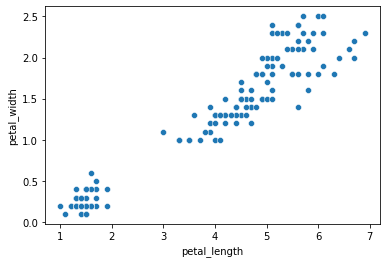

In [33]:
# Scatterplot de la longitud del sépalo vs el ancho del sépalo:

sns.scatterplot(data=irisData, x="petal_length", y="petal_width")

In [34]:
# Se eligen las variables con mayor correlación (sépalo)

correlacion = irisData['petal_length'].corr(irisData['petal_width'])
X = irisData[["petal_length", "petal_width"]].values

#### 2.Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [35]:
K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

In [36]:
Escalador = pp.StandardScaler()
X = Escalador.fit_transform(X)

K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


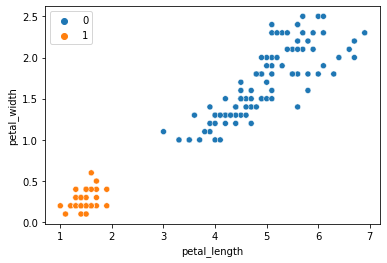

In [37]:
sns.scatterplot(data=irisData, x="petal_length", y="petal_width", hue=Labels)

#### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

In [38]:
distancia = [cluster.KMeans(n_clusters=i).fit(X).inertia_ for i in range(1, 11)]
K = np.arange(1, 11)

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

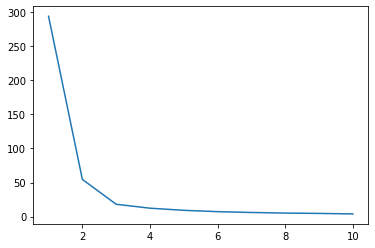

In [39]:
sns.lineplot(x=K, y=distancia)

#### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

####  6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

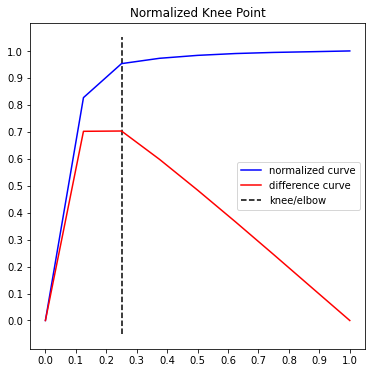

In [40]:

K = range(1, 10)
inertias = [cluster.KMeans(n_clusters=i).fit(X).inertia_ for i in K]
kn1 = kn.KneeLocator(K, inertias, curve='convex', direction='decreasing')
kn1.plot_knee_normalized()

In [41]:
# Metricas de desempeño:

print("El número óptimo de clusters es: ", kn1.knee)
print("La inercia es: ", inertias[kn1.knee-1])


El número óptimo de clusters es:  3
La inercia es:  18.03573391109313
